# Import Libraries

In [1429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline

# Load Dataset

In [1430]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,no,582,0,20,1.0,265000,1.9,130.0,1,0.0,4,1
1,55.0,no,7861,0,38,0.0,263358.03,1.1,136.0,1,0.0,6,1
2,65.0,no,146,0,20,0.0,162000,1.3,129.0,1,1.0,7,1
3,50.0,yes,111,0,20,0.0,210000,1.9,137.0,1,0.0,7,1
4,65.0,yes,160,1,20,0.0,327000,2.7,116.0,0,0.0,8,1


# Data pre-processing

In [1431]:
#let's take a look on the structure of the data
df.info()
print("Shape :", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       297 non-null    float64
 1   anaemia                   298 non-null    object 
 2   creatinine_phosphokinase  296 non-null    object 
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         298 non-null    object 
 5   high_blood_pressure       298 non-null    float64
 6   platelets                 294 non-null    object 
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              297 non-null    float64
 9   sex                       299 non-null    int64  
 10  smoking                   297 non-null    float64
 11  time                      298 non-null    object 
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 30.5+ KB
Shape :

In [1432]:
# Check the total missing values in each column.
print("Total NULL Values in each columns")
print("*********************************")
print(df.isnull().sum())


Total NULL Values in each columns
*********************************
age                         2
anaemia                     1
creatinine_phosphokinase    3
diabetes                    0
ejection_fraction           1
high_blood_pressure         1
platelets                   5
serum_creatinine            0
serum_sodium                2
sex                         0
smoking                     2
time                        1
DEATH_EVENT                 0
dtype: int64


From dataset description, we can see that:

    - The shape of the dataset is (299, 14).
    - There are missing values.
    - There are dammaged data
    - The data type of same columns need to be converted.

In [1433]:
#Handel dammaged data
df['platelets'] = df['platelets'].str.extract('(\d+)')
df['creatinine_phosphokinase'] = df['creatinine_phosphokinase'].str.extract('(\d+)')
df['time'] = df['time'].str.extract('(\d+)')
df['ejection_fraction'] = df['ejection_fraction'].str.extract('(\d+)')
df['anaemia']= df['anaemia'].str.replace('[^a-zA-Z]', '', regex=True)

#filling missing values by mean or mode
df['age'] = df['age'].fillna(round(df['age'].mean()))
df['platelets'] = df['platelets'].fillna(round(df['platelets'].astype(float).mean())) 
df['serum_sodium'] = df['serum_sodium'].fillna(round(df['serum_sodium'].astype(float).mean())) 
df['ejection_fraction'] = df['ejection_fraction'].fillna(round(df['ejection_fraction'].astype(float).mean())) 
df['anaemia'] = df['anaemia'].fillna(df['anaemia'].mode()[0])
df['high_blood_pressure'] = df['high_blood_pressure'].fillna(df['high_blood_pressure'].mode()[0])
df['smoking'] = df['smoking'].fillna(df['smoking'].mode()[0]) 
df['creatinine_phosphokinase'] = df['creatinine_phosphokinase'].fillna(round(df['creatinine_phosphokinase'].astype(float).mean())) 
df['time'] = df['time'].fillna(round(df['time'].astype(float).mean())) 

# Check again the total missing values in each column.
print("Total NULL Values in each columns")
print("*********************************")
print(df.isnull().sum())



Total NULL Values in each columns
*********************************
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [1434]:
#change some Data types
df = df.astype({'age': int})
df = df.astype({'ejection_fraction': int})
df = df.astype({'time': int})
df = df.astype({'creatinine_phosphokinase': int})
df = df.astype({'platelets': int})
df = df.astype({'smoking': int})
df.info()

#display all rows
#pd.set_option('display.max_rows', df.shape[0]+1)
#print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int32  
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int32  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int32  
 5   high_blood_pressure       299 non-null    float64
 6   platelets                 299 non-null    int32  
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    float64
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int32  
 11  time                      299 non-null    int32  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int32(6), int64(3), object(1)
memory usage: 23.5+ 

### Features distributions to numerical data and Categorical data

In [1435]:
num_col = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time','age']
cat_col = ['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']

num_data = df[num_col]
cat_data = df[cat_col]

In [1436]:
df[num_col].describe()

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,age
count,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.000000
mean,582.779264,38.093645,263794.872910,1.39388,136.622074,130.043478,60.892977
std,969.401693,11.833489,97597.219316,1.03451,4.411811,77.523247,11.858304
min,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000,40.000000
25%,118.500000,30.000000,215000.000000,0.90000,134.000000,73.000000,51.000000
50%,250.000000,38.000000,263358.000000,1.10000,137.000000,115.000000,60.000000
75%,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000,70.000000
max,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000,95.000000


### Numerical features

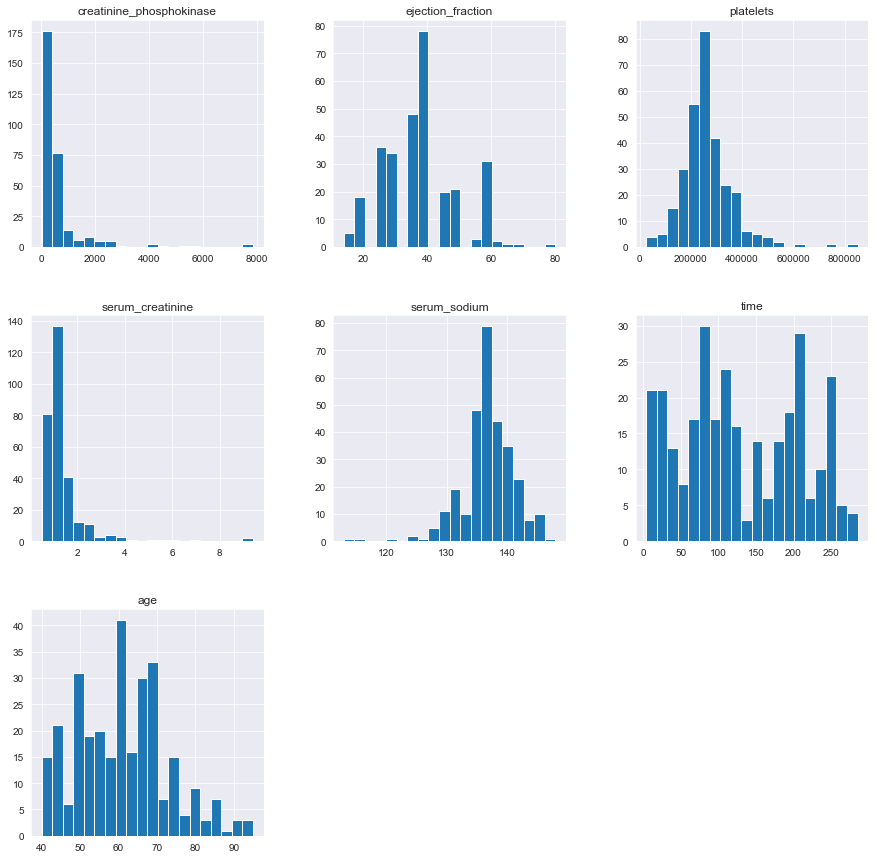

In [1437]:
df[num_col].hist(bins=20,figsize=(15, 15))
plt.show()

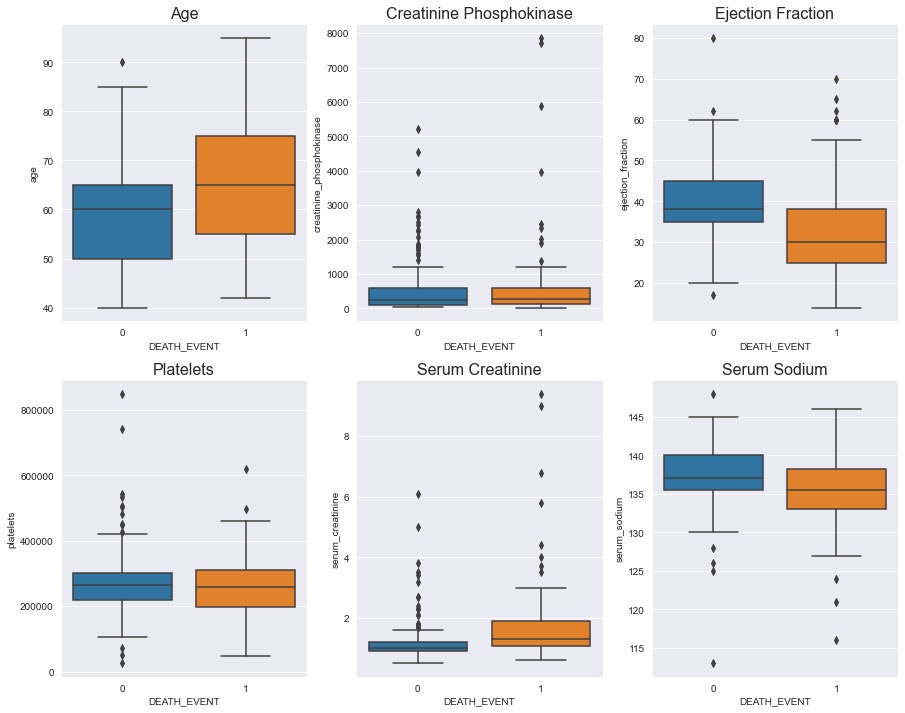

In [1438]:
fig, ax = plt.subplots(2,3, figsize = [15, 12])
ax[0,0].set_title('Age', fontsize = 16)
sns.boxplot(data = df, y = 'age', x= 'DEATH_EVENT', ax = ax[0,0])
ax[0,1].set_title('Creatinine Phosphokinase', fontsize = 16)
sns.boxplot(data = df, y = 'creatinine_phosphokinase', x= 'DEATH_EVENT', ax = ax[0,1])
ax[0,2].set_title('Ejection Fraction', fontsize = 16)
sns.boxplot(data = df, y = 'ejection_fraction', x= 'DEATH_EVENT', ax = ax[0,2])
ax[1,0].set_title('Platelets', fontsize = 16)
sns.boxplot(data = df, y = 'platelets', x= 'DEATH_EVENT', ax = ax[1,0])
ax[1,1].set_title('Serum Creatinine', fontsize = 16)
sns.boxplot(data = df, y = 'serum_creatinine', x= 'DEATH_EVENT', ax = ax[1,1])
ax[1,2].set_title('Serum Sodium', fontsize = 16)
sns.boxplot(data = df, y = 'serum_sodium', x= 'DEATH_EVENT', ax = ax[1,2])
plt.show()

### Categorical features

In [1439]:
for col in list(df[cat_col]):
    print("variable:", col)
    print(df[col].value_counts(dropna=False).to_string())
    

variable: anaemia
no     171
yes    128
variable: diabetes
0    174
1    125
variable: high_blood_pressure
0.0    194
1.0    105
variable: sex
1    194
0    105
variable: smoking
0    204
1     95
variable: DEATH_EVENT
0    203
1     96


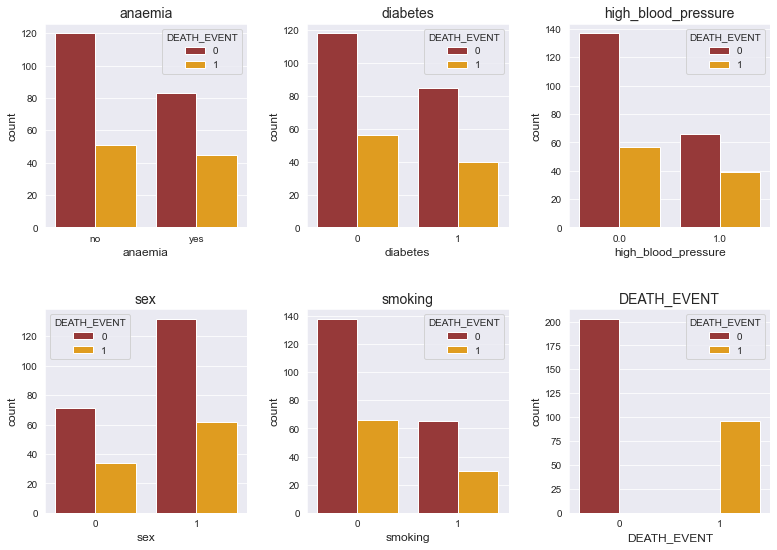

In [1440]:
plt.figure(figsize=(13, 9))
for i, var in enumerate(cat_col):
    plt.subplot(2, 3, i+1)
    plt.title(var, fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
    sns.countplot(data= df, x = var, hue="DEATH_EVENT", palette = ['brown', "orange"])

### Data Correlation

The Correlation matrix shows the correlation among all the features and their correlation with the DEATH_EVENT.


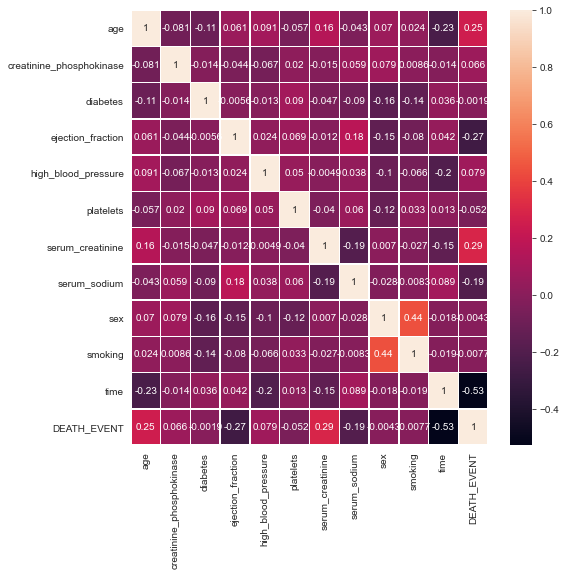

time                        0.525650
serum_creatinine            0.294278
ejection_fraction           0.269218
age                         0.250674
serum_sodium                0.194711
high_blood_pressure         0.079351
creatinine_phosphokinase    0.066085
platelets                   0.052294
smoking                     0.007718
sex                         0.004316
diabetes                    0.001943
dtype: float64

In [1441]:
#Data Correlation
fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(df.corr(), annot = True, linewidths = .5, ax = ax)
plt.show()
#fig.savefig('DataCorrelation.eps',format='eps')
feature_correlation_matrix = df.corr()
feature_correlation_matrix = df[df.columns.difference(["DEATH_EVENT"])].corrwith(df["DEATH_EVENT"]).abs()
feature_correlation_matrix.sort_values(ascending=False)


We can see that age, ejection_fraction, serum_creatinine, serum_sodium, and time appear to have the highest correlation to DEATH_EVENT which will . Also worth noting:

   - There's a slight correlation between age and serum_creatinine
   - There's a slight correlation between sex and ejection_fraction
   - There's a slight correlation between age and time

### Feature selection

If the absolute value of the correlation to "DEATH_EVENT" is is greater than 0.1 feature will be selected

In [1442]:
#Selecting feature columns based on the result of the Correlation matrix 
feature_selected = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium','time']
X = df[feature_selected]
Y = df.DEATH_EVENT


#Define 'all_features' that has all the features
all_features = ['age', 'anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets',
                    'serum_creatinine', 'serum_sodium','time','sex','smoking']
#creating a copy of our dataset 
df_copy=df
#replace yes by 1 and no by 0 in 
df_copy['anaemia'] = df['anaemia'].replace({"yes": 1, "no": 0})
X_ALL = df_copy[all_features]


# Clustering

In [1443]:
x_train = df_copy.iloc[:, :-1]
y_train = df_copy.iloc[:, -1].to_numpy().flatten()

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_train_scaled_df = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)

features_x = x_train_scaled_df.to_numpy()

In [1444]:
model_metrics1 = dict()
model_metrics2 = dict()

Based on the previous correlation matrix we can conclude that 'serum_creatinine' and 'ejection_fraction' are the most important features out of all the others

[Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0, 0.5, 'ejection_fraction')]

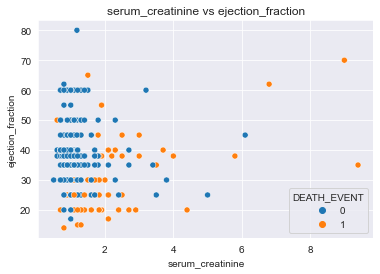

In [1445]:
col1 = 'serum_creatinine'
col2 = 'ejection_fraction'
ax = sns.scatterplot(data=df, x=col1, y=col2, hue='DEATH_EVENT')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)
#ax.figure.savefig('figure4.eps',format='eps')

### 1-KMeans Clustering

    1-1 using all features

In [1446]:
all_x = x_train_scaled_df.to_numpy()
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 10, random_state=0).fit(all_x)
clusters = clustering.labels_
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(all_x, clusters, metric = "euclidean")
print("silhouette coefficient :",silhouette_coefficient)
model_metrics1['KMeans Clustering'] = [silhouette_coefficient]

silhouette coefficient : 0.1177595210416796


[Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0, 0.5, 'ejection_fraction')]

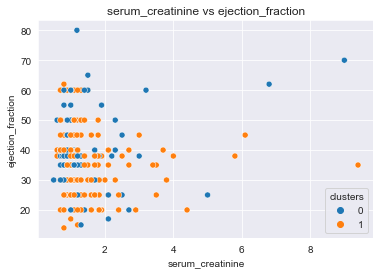

In [1447]:
df['clusters'] = clusters
ax = sns.scatterplot(data=df, x=col1, y=col2, hue='clusters')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)

    1-2 using selected features

In [1448]:
x = x_train_scaled_df.loc[:, feature_selected].to_numpy()
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 10, random_state=0).fit(x)
clusters = clustering.labels_
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(x, clusters, metric = "euclidean")
print("silhouette coefficient :",silhouette_coefficient)
model_metrics2['KMeans Clustering'] = [silhouette_coefficient]

silhouette coefficient : 0.21398541978151586


[Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0, 0.5, 'ejection_fraction')]

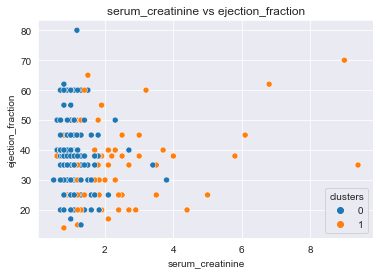

In [1449]:
df['clusters'] = clusters
ax = sns.scatterplot(data=df, x=col1, y=col2, hue='clusters')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)
#ax.figure.savefig('figure5.eps',format='eps')

### 2-Hierarchical Clustering - Single Linkage

    2-1 using all features

In [1450]:
all_x = x_train_scaled_df.to_numpy()
clustering = linkage(all_x, method="single", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(all_x, clusters, metric = "euclidean")
print("silhouette coefficient :",silhouette_coefficient)
model_metrics1['Hierarchical Clustering - Single Linkage'] = [silhouette_coefficient]

silhouette coefficient : 0.416463040227142


[Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0, 0.5, 'ejection_fraction')]

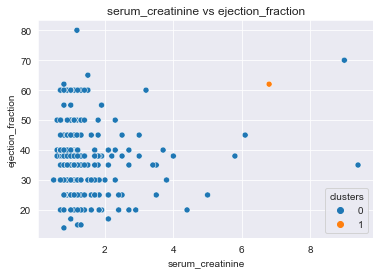

In [1451]:
df['clusters'] = clusters - 1
ax = sns.scatterplot(data=df, x=col1, y=col2, hue='clusters')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)

    2-2 using selected features

In [1452]:
x = x_train_scaled_df.loc[:, feature_selected].to_numpy()
clustering = linkage(x, method="single", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(x, clusters, metric = "euclidean")
print("silhouette coefficient :",silhouette_coefficient)
model_metrics2['Hierarchical Clustering - Single Linkage'] = [silhouette_coefficient]

silhouette coefficient : 0.6462211525769255


[Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0, 0.5, 'ejection_fraction')]

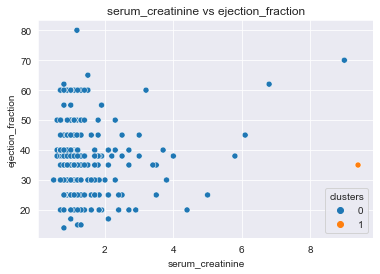

In [1453]:
df['clusters'] = clusters - 1
ax = sns.scatterplot(data=df, x=col1, y=col2, hue='clusters')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)
#ax.figure.savefig('figure6.eps',format='eps')

### 3-Hierarchical Clustering - Complete Linkage

    3-1 using all features

In [1454]:
all_x = x_train_scaled_df.to_numpy()
clustering = linkage(all_x, method="complete", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(all_x, clusters, metric = "euclidean")
print("silhouette coefficient :",silhouette_coefficient)
model_metrics1['Hierarchical Clustering - Complete Linkage'] = [silhouette_coefficient]

silhouette coefficient : 0.4687657282154225


[Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0, 0.5, 'ejection_fraction')]

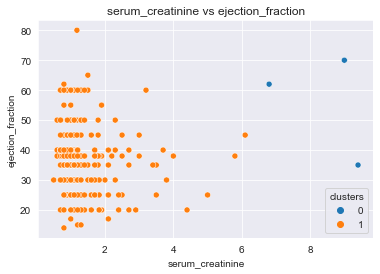

In [1455]:
df['clusters'] = clusters - 1
ax = sns.scatterplot(data=df, x=col1, y=col2, hue='clusters')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)

    3-2 using selected features

In [1456]:
x = x_train_scaled_df.loc[:, feature_selected].to_numpy()
clustering = linkage(x, method="complete", metric = "euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
adjusted_rand_index = metrics.adjusted_rand_score(y_train, clusters)
silhouette_coefficient = metrics.silhouette_score(x, clusters, metric = "euclidean")
print("silhouette coefficient :",silhouette_coefficient)
model_metrics2['Hierarchical Clustering - Complete Linkage'] = [silhouette_coefficient]

silhouette coefficient : 0.5790278574454126


[Text(0.5, 1.0, 'serum_creatinine vs ejection_fraction'),
 Text(0.5, 0, 'serum_creatinine'),
 Text(0, 0.5, 'ejection_fraction')]

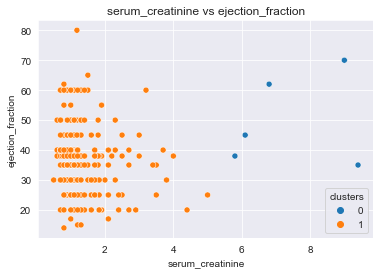

In [1457]:
df['clusters'] = clusters - 1
ax = sns.scatterplot(data=df, x=col1, y=col2, hue='clusters')
ax.set(title = '{} vs {}'.format(col1, col2), xlabel = col1, ylabel = col2)
#ax.figure.savefig('figure7.eps',format='eps')

    Summary of the results using all predictor features :

In [1458]:
# Display metric data from models (using all feautres)
pd.DataFrame.from_dict(model_metrics1,
                       orient = 'index',
                       columns = ['Silhouette Coefficient'])

,Silhouette Coefficient
KMeans Clustering,0.117760
Hierarchical Clustering - Single Linkage,0.416463
Hierarchical Clustering - Complete Linkage,0.468766


    Summary of the results using selected features as predictor :

In [1459]:
# Display metric data from models (using selected feautres)
pd.DataFrame.from_dict(model_metrics2,
                       orient = 'index',
                       columns = ['Silhouette Coefficient'])

,Silhouette Coefficient
KMeans Clustering,0.213985
Hierarchical Clustering - Single Linkage,0.646221
Hierarchical Clustering - Complete Linkage,0.579028


    Best performing clustering model :

# Classification

### Splitting Data

Splitting data using all features :

In [1460]:
# Split dataset into training set and test set
X_train_all, X_test_all, Y_train_all, Y_test_all = train_test_split(X_ALL, Y, test_size=0.2, random_state=1) # 80% training and 20% for testing
print("X_Train_all Shape:", X_train_all.shape)
print("Y_Train_all Shape:", Y_train_all.shape)
print("X_Test_all Shape:", X_test_all.shape)
print("Y_Test_all Shape:", Y_test_all.shape)


X_Train_all Shape: (239, 12)
Y_Train_all Shape: (239,)
X_Test_all Shape: (60, 12)
Y_Test_all Shape: (60,)


Splitting data using only selected features :

In [1461]:
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) # 80% training and 20% for testing
print("X_Train Shape:", X_train.shape)
print("Y_Train Shape:", Y_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Test Shape:", Y_test.shape)


X_Train Shape: (239, 5)
Y_Train Shape: (239,)
X_Test Shape: (60, 5)
Y_Test Shape: (60,)


In [1462]:
model_metrics_all = dict()
model_metrics = dict()

### 1-Decision Tree

    1.1 - Decison tree using all predictor features

In [1463]:
#Building Decision Tree Model using all features
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=0)
# Train Decision Tree Classifer
clf = clf.fit(X_train_all,Y_train_all)
#Predict the response for test dataset
Y_pred = clf.predict(X_test_all)

In [1464]:
print("Accuracy:",metrics.accuracy_score(Y_test_all, Y_pred))
print("Mean squared error(MSE) :",mean_squared_error(Y_test_all, Y_pred))
print("Precision Score:", metrics.precision_score(Y_test_all, Y_pred ) )
print("Recall Score:\t", metrics.recall_score(Y_test_all, Y_pred ) ) 
print("F1 Score:",metrics.f1_score(Y_test_all, Y_pred ))

model_metrics_all['Decision-Tree'] = [metrics.accuracy_score(Y_test_all,Y_pred),mean_squared_error(Y_test_all, Y_pred), metrics.precision_score(Y_test_all, Y_pred ) ,metrics.recall_score(Y_test_all, Y_pred ),metrics.f1_score(Y_test_all, Y_pred )]

Accuracy: 0.7666666666666667
Mean squared error(MSE) : 0.23333333333333334
Precision Score: 0.5
Recall Score:	 0.7857142857142857
F1 Score: 0.6111111111111112


Model Evaluation :

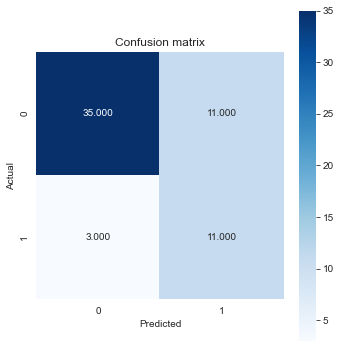

In [1465]:
conf_matrix = metrics.confusion_matrix(Y_test_all, Y_pred)
fig, ax = plt.subplots(figsize=(5,5))        
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

    1.2 - Decison tree using selected features as predictor variables

In [1466]:
#Building Decision Tree Model
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=0)
# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)
#Predict the response for test dataset
Y_pred = clf.predict(X_test)

Let's estimate, how accurately the classifier or model can predict



Accuracy can be computed by comparing actual test set values and predicted values.


In [1467]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Mean squared error(MSE) :",mean_squared_error(Y_test, Y_pred))
print("Precision Score:", metrics.precision_score(Y_test, Y_pred ) ) 
print("Recall Score:\t", metrics.recall_score(Y_test, Y_pred ) ) 
print("F1 Score:",metrics.f1_score(Y_test, Y_pred ))
model_metrics['Decision-Tree'] = [metrics.accuracy_score(Y_test,Y_pred),mean_squared_error(Y_test, Y_pred), metrics.precision_score(Y_test, Y_pred ) ,metrics.recall_score(Y_test, Y_pred ),metrics.f1_score(Y_test, Y_pred )]

Accuracy: 0.85
Mean squared error(MSE) : 0.15
Precision Score: 0.6470588235294118
Recall Score:	 0.7857142857142857
F1 Score: 0.7096774193548386


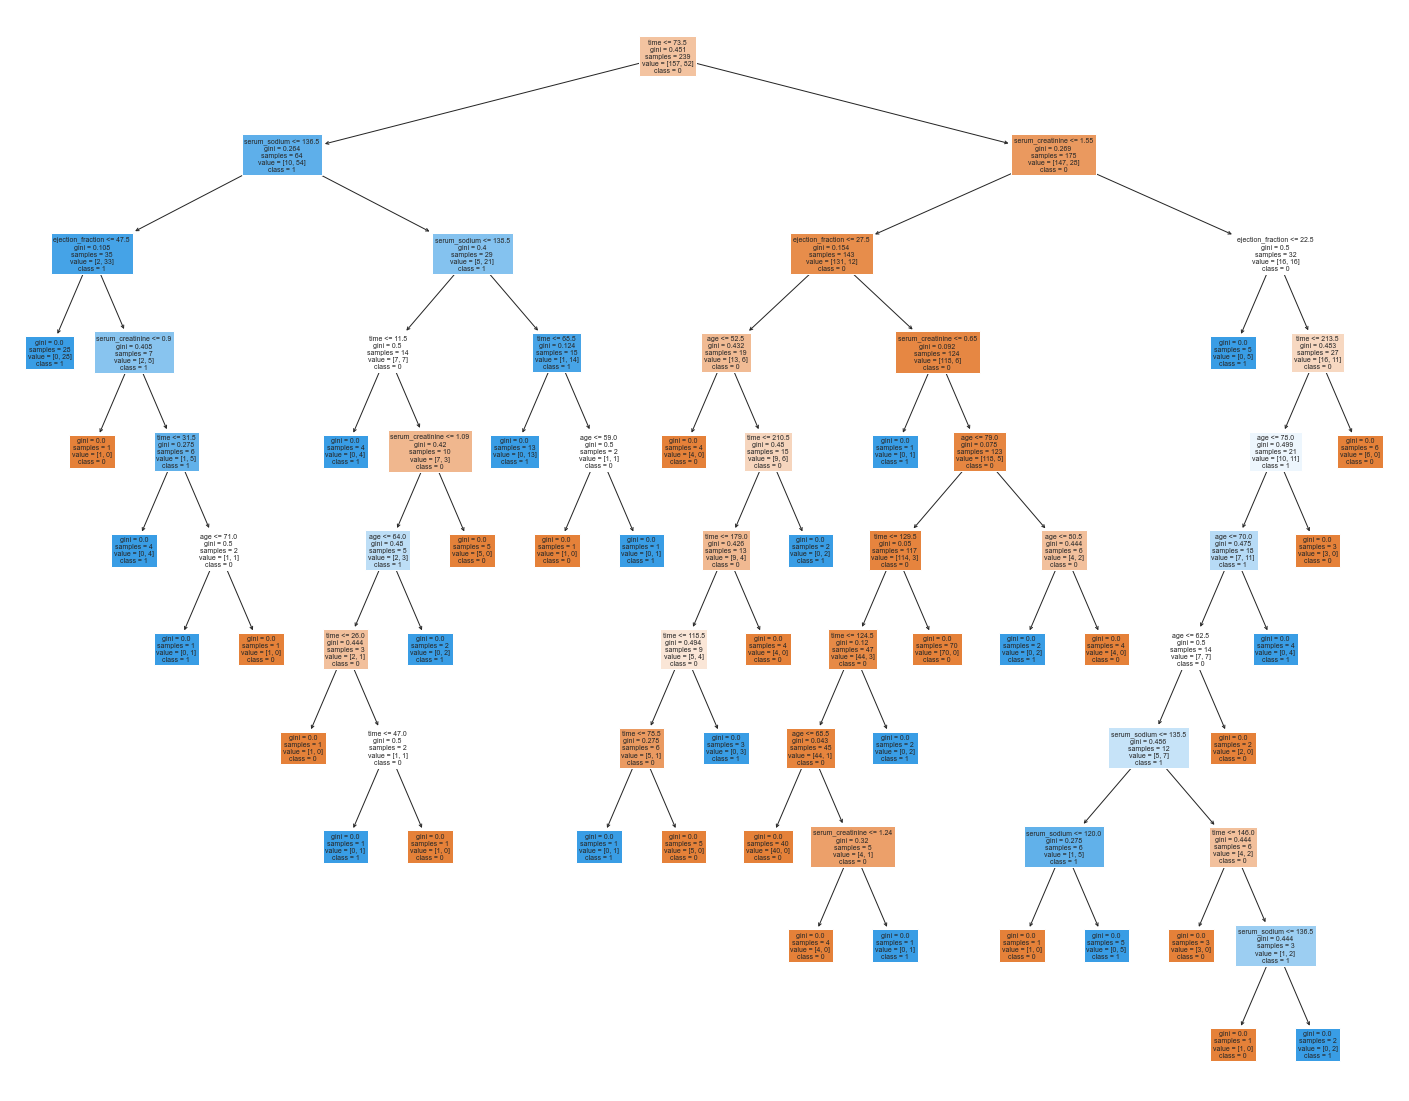

In [1468]:
#Visualizing Decision Trees

fig = plt.figure(figsize=(25,20))
#displaying the tree
plot_tree(clf, feature_names=feature_selected, filled=True,
         class_names=["0", "1"]);


Model Evaluation :

Let's create a Confusion matrix to evaluate the performance of our classification model

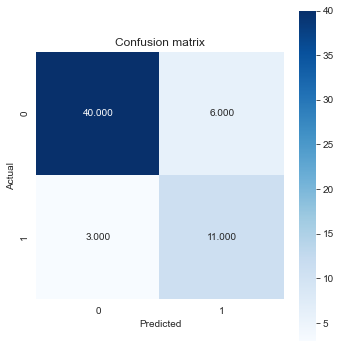

In [1469]:
conf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
fig, ax = plt.subplots(figsize=(5,5))        
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

### 2-Logistic Regression


    2.1 - Logistic Regression using all predictor features

In [1470]:
logReg = LogisticRegression(random_state=0, solver='liblinear')
logReg.fit(X_train_all, Y_train_all)
#Check accuracy of Logistic Regression
y_pred_logReg = logReg.predict(X_test_all)
#Model Accuracy
print("Accuracy of logistic regression classifier : " ,metrics.accuracy_score(Y_test_all,y_pred_logReg))
print("Mean squared error(MSE) :",mean_squared_error(Y_test_all, y_pred_logReg))
print("Precision Score:", metrics.precision_score(Y_test_all, y_pred_logReg ) )
print("Recall Score:\t", metrics.recall_score(Y_test_all, y_pred_logReg ) ) 
print("F1 Score:",metrics.f1_score(Y_test_all, y_pred_logReg ))
model_metrics_all['Logistic-Regression'] = [metrics.accuracy_score(Y_test_all,y_pred_logReg),mean_squared_error(Y_test_all, y_pred_logReg), metrics.precision_score(Y_test_all, y_pred_logReg ) ,metrics.recall_score(Y_test_all, y_pred_logReg ),metrics.f1_score(Y_test_all, y_pred_logReg )]

Accuracy of logistic regression classifier :  0.9
Mean squared error(MSE) : 0.1
Precision Score: 0.8333333333333334
Recall Score:	 0.7142857142857143
F1 Score: 0.7692307692307692


Model Evaluation :

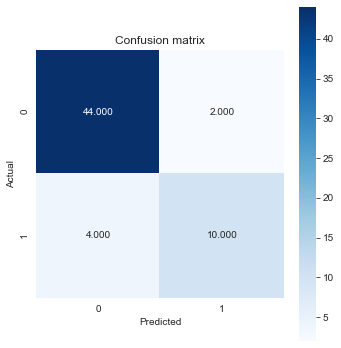

In [1471]:
conf_matrix = metrics.confusion_matrix(Y_test_all, y_pred_logReg)
fig, ax = plt.subplots(figsize=(5,5))        
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

    2.2 - Logistic Regression using selected features as predictor variables

In [1472]:
logReg = LogisticRegression(random_state=0, solver='liblinear')
logReg.fit(X_train, Y_train)
#Check accuracy of Logistic Regression
y_pred_logReg = logReg.predict(X_test)
#Model Accuracy
print("Accuracy : " ,metrics.accuracy_score(Y_test,y_pred_logReg))
print("Mean squared error(MSE) :",mean_squared_error(Y_test, y_pred_logReg))
print("Precision Score:", metrics.precision_score(Y_test, y_pred_logReg ) )
print("Recall Score:\t", metrics.recall_score(Y_test, y_pred_logReg ) )
print("F1 Score:",metrics.f1_score(Y_test, y_pred_logReg ))
model_metrics['Logistic-Regression'] = [metrics.accuracy_score(Y_test,y_pred_logReg),mean_squared_error(Y_test, y_pred_logReg), metrics.precision_score(Y_test, y_pred_logReg ) ,metrics.recall_score(Y_test, y_pred_logReg ),metrics.f1_score(Y_test, y_pred_logReg )]

Accuracy :  0.8833333333333333
Mean squared error(MSE) : 0.11666666666666667
Precision Score: 0.7333333333333333
Recall Score:	 0.7857142857142857
F1 Score: 0.7586206896551724


Model Evaluation :

Let's create a Confusion matrix to evaluate the performance of our classification model

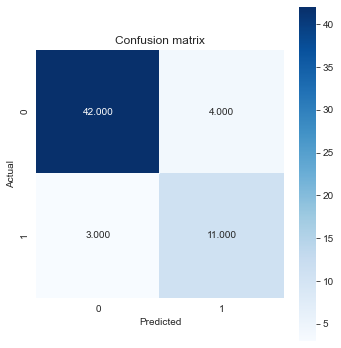

In [1473]:
conf_matrix = metrics.confusion_matrix(Y_test, y_pred_logReg)
fig, ax = plt.subplots(figsize=(5,5))        
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

### 3-Random Forest Classifier

3.1 - Random Forest using all predictor features

In [1474]:
model=RandomForestClassifier(random_state=0)
model.fit(X_train_all,Y_train_all)
y_pred = model.predict(X_test_all)
print("Accuracy : " ,metrics.accuracy_score(Y_test_all,y_pred))
print("Mean squared error(MSE) :",mean_squared_error(Y_test_all, y_pred))
print("Precision Score:", metrics.precision_score(Y_test_all, y_pred ) ) 
print("Recall Score:\t", metrics.recall_score(Y_test_all, y_pred ) ) 
print("F1 Score:",metrics.f1_score(Y_test_all, y_pred ))
model_metrics_all['Random-Forest-Classifier'] = [metrics.accuracy_score(Y_test_all,y_pred),mean_squared_error(Y_test_all, y_pred), metrics.precision_score(Y_test_all, y_pred ) ,metrics.recall_score(Y_test_all, y_pred ),metrics.f1_score(Y_test_all, y_pred )]


Accuracy :  0.95
Mean squared error(MSE) : 0.05
Precision Score: 0.9230769230769231
Recall Score:	 0.8571428571428571
F1 Score: 0.888888888888889


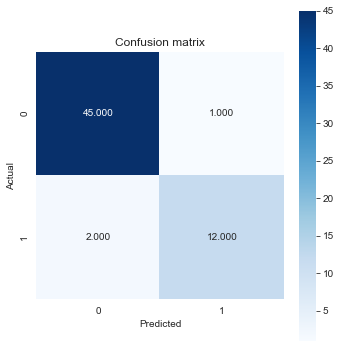

In [1475]:
conf_matrix = metrics.confusion_matrix(Y_test_all, y_pred)
fig, ax = plt.subplots(figsize=(5,5))        
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

3.2 - Random Forest using selected features as predictor variables

In [1476]:
model=RandomForestClassifier(random_state=0)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print("Accuracy : " ,metrics.accuracy_score(Y_test,y_pred))
print("Mean squared error(MSE) :",mean_squared_error(Y_test, y_pred))
print("Precision Score:", metrics.precision_score(Y_test, y_pred ) ) 
print("Recall Score:\t", metrics.recall_score(Y_test, y_pred ) )
print("F1 Score:",metrics.f1_score(Y_test, y_pred ))
model_metrics['Random-Forest-Classifier'] = [metrics.accuracy_score(Y_test,y_pred),mean_squared_error(Y_test, y_pred), metrics.precision_score(Y_test, y_pred ) ,metrics.recall_score(Y_test, y_pred ),metrics.f1_score(Y_test, y_pred )]

Accuracy :  0.9
Mean squared error(MSE) : 0.1
Precision Score: 0.7857142857142857
Recall Score:	 0.7857142857142857
F1 Score: 0.7857142857142857


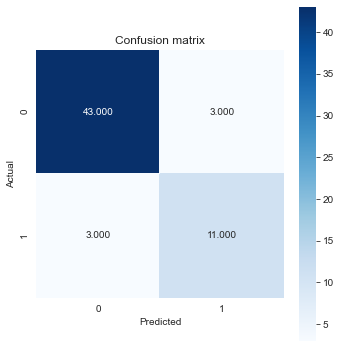

In [1477]:
conf_matrix = metrics.confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))        
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

    Summary of the results using all predictor features :

In [1478]:
# Display metric data from models (using all feautres)
pd.DataFrame.from_dict(model_metrics_all,
                       orient = 'index',
                       columns = ['Model Accuracy', 'MSE','Precision Score','Recall Score','F1 Score'])

,Model Accuracy,MSE,Precision Score,Recall Score,F1 Score
Decision-Tree,0.766667,0.233333,0.500000,0.785714,0.611111
Logistic-Regression,0.900000,0.100000,0.833333,0.714286,0.769231
Random-Forest-Classifier,0.950000,0.050000,0.923077,0.857143,0.888889


    Summary of the results using only selected features as predictor variables :

In [1479]:
# Display metric data from models (using selected feautres)
pd.DataFrame.from_dict(model_metrics,
                       orient = 'index',
                       columns = ['Model Accuracy','MSE', 'Precision Score','Recall Score','F1 Score'])

,Model Accuracy,MSE,Precision Score,Recall Score,F1 Score
Decision-Tree,0.850000,0.150000,0.647059,0.785714,0.709677
Logistic-Regression,0.883333,0.116667,0.733333,0.785714,0.758621
Random-Forest-Classifier,0.900000,0.100000,0.785714,0.785714,0.785714


    Best performing classification model


# Frequent pattern mining

A possible application of the model can be the following :

A possible application of the model can be the following :
Imagine that we are in a context where the algorithm helps the cardiological department of a hospital to discriminate which of the many patients require more careful medical analysis or more specific treatments. We could then exploit the classification strategy in terms of probability thresholds, setting the threshold as a function of the department capacity. The department capacity can be expressed for example in terms of the availability of the medical department's staff or the number of free hospital beds. Then, we can lower the threshold whenever the department has a high capacity and as a result, we predict more often the risk for the patients maximizing the chance of saving their life,and thus make decisions about how closely patients need to be monitored and how aggressively they need to be treated, etc.


On the other hand, whenever the hospital is already busy we can raise up threshold and as a result, the number of prediction of risk decreases but the prediction identify patients that really require treatments with more confidence.

# Conclusion

The levels of 'ejection_fraction', 'serum_creatinine', 'serum_sodium' play an important role in the event of heart failure or the abnormalities in the levels of these become an important factor in triggerring heart failure condition.

We have experimented with many classification algorithms on this dataset, each of these shows pros and cons. Based on the experiments we can say that the Random Forest Classifier is the best for this kind of data since it has highest test accuracy of 0.95 and lowest MSE of 0.05 .Moreover, its classification strategy based on probability gives a lot of flexibility to the model.



The accuracy and model performance can be also increased if more data is made available for the model to train on. This data limitation, limits the model performance to some extent. As more and more data becomes available, the prediction accuracy and model's ability to act on other similar real-time data could be enhanced.